# AI MEGADADOS 24-1

**NOME**: SEU NOME AQUI!

## Parte 1 - Autocar!

Na parte 1 da prova de Megadados, iremos trabalhar com a base de dados sintética **autocar**. Esta base modela um cenário de manutenção de automóveis.

Ao levar um automóvel para manutenção, é criada uma **ordem de serviço**. Na ordem de serviço, são incluídos **serviços** realizados, para que o cliente pague pela mão de obra (limpeza, desmontagem). Ainda, também é possível incluir **peças** na ordem de serviço (pastilhas de freios, engrenagens).

### Instalação da base

Execute os scripts `autocar.sql` no MySQL Workbench. Este script cria uma base `autocar` e insere alguns dados de exemplo para resolução da prova.

A base pode ser representada pelo seguinte diagrama do model orelacional (diagrama ER):

<img src="img/deer_autocar.png">

### Insper autograding!

Para receber feedback dos exercício na parte 1, iremos utilizar o `insper autograding`. Garanta que a biblioteca está instalada em seu ambiente Python.

**Sugestão**: para aproveitar o `.env`, crie uma pasta para a prova no mesmo local onde costuma deixar as pastas das **aulas**!

## Como resolver os exercícios?

Crie a base da prova em sua máquina (passo anterior). Utilize o MySQL Workbench ou o conector para testar as queries. Quando estiver bastante certo de que a resposta está correta, faça a submissão para o servidor.

Em alguns momentos, pode ser necessário analisar a resposta esperada do servidor para entender modificações na sua solução, mesmo que não seja algo explícito no enunciado.

## Import das bibliotecas

Vamos realizar o import das bibliotecas.

In [1]:
import mysql.connector
from functools import partial
import os
import insperautograder.jupyter as ia
from dotenv import load_dotenv

E vamos criar nosso HELPER de conexão com o banco! Perceba que, uma vez configurado o `.env` não precisaremos mais informar usuários, senhas e URLs!

In [2]:
load_dotenv(override=True)

def get_connection_helper():

    def run_db_query(connection, query, args=None):
        with connection.cursor() as cursor:
            print("Executando query:")
            cursor.execute(query, args)
            for result in cursor:
                print(result)

    connection = mysql.connector.connect(
        host=os.getenv("MD_DB_SERVER"),
        user=os.getenv("MD_DB_USERNAME"),
        password=os.getenv("MD_DB_PASSWORD"),
        database="autocar",
    )
    return connection, partial(run_db_query, connection)


connection, db = get_connection_helper()

### Notas

Para conferir a nota da correção automática da prova, utilize:

In [3]:
ia.grades(task="ai_md_24_1")

|    | Atividade   | Exercício   |   Peso |   Nota |
|---:|:------------|:------------|-------:|-------:|
|  0 | ai_md_24_1  | ex01        |      2 |      0 |
|  1 | ai_md_24_1  | ex02        |      2 |      0 |
|  2 | ai_md_24_1  | ex03        |      2 |      0 |
|  3 | ai_md_24_1  | ex04        |      2 |      0 |
|  4 | ai_md_24_1  | ex05        |      4 |      0 |
|  5 | ai_md_24_1  | ex06        |      2 |      0 |
|  6 | ai_md_24_1  | ex07        |      2 |      0 |

In [4]:
ia.grades(by="TASK", task="ai_md_24_1")

|    | Tarefa     |   Nota |
|---:|:-----------|-------:|
|  0 | ai_md_24_1 |      0 |

**Obs**:

- As questões 1 a 7 valem **6.0 pontos** na nota da prova.
    - Estas questões serão corrigidas **apenas** pela correção automática. Não haverá nota manual.
    - Confira os pesos pela API.
    - No servidor, a nota da atividade estará no intervalo 0 a 10. Multiplique por `0.6` para saber a real contribuição na nota da prova.
- A questão 8 vale **0.5 pontos** na nota da prova.
- As questões 9 e 10 valem **3.5 pontos** na nota da prova:
    - **2.5 pontos** para a questão 9.
    - **1.0 pontos** para a questão 10.

**Exercício 1**: Crie uma query que retorne o nome, telefone e e-mail de todos os clientes que moram em alguma avenida.

**Obs**: Ordene de forma crescente pelo nome do cliente.

In [9]:
sql_ex01 = """
SELECT c.nome, c.telefone, c.email from cliente c
where c.endereco like "Av.%" or c.endereco like "Avenida%"
order by c.nome
"""

db(sql_ex01)

Executando query:
('Maria Santos', '11-98765-4322', 'maria@email.com')
('Paulo Oliveira', '11-99911-1234', 'paulo@email.com')
('Pedro Pereira', '31-99874-6543', 'pedro@email.com')


Após testar localmente e considerar sua solução correta, faça o envio clicando no botão abaixo!

In [10]:
ia.sender(answer="sql_ex01", task="ai_md_24_1", question="ex01", answer_type="pyvar")

interactive(children=(Button(description='Enviar ex01', style=ButtonStyle()), Output()), _dom_classes=('widget…

**Exercício 2**: Crie uma query que retorne o `cep`, o nome da `cidade` e o nome do `uf` dos CEPs cadastrados.

Utilize a nomenclatura (`cep`, `cidade`, `uf`) e ordene de forma decrescente pelo código do CEP.

In [13]:
sql_ex02 = """
SELECT ce.codigo as cep, ci.nome as cidade, u.nome as uf from cep ce
inner join cidade ci using(cidade_id)
inner join uf u using(uf_id)
order by ce.codigo desc
"""

db(sql_ex02)

Executando query:
('90901000', 'Porto Alegre', 'RS')
('80000000', 'Curitiba', 'PR')
('70002970', 'Brasília', 'DF')
('30120000', 'Belo Horizonte', 'MG')
('24030000', 'Niterói', 'RJ')
('20000000', 'Rio de Janeiro', 'RJ')
('01002200', 'São Paulo', 'SP')
('01001000', 'São Paulo', 'SP')


Após testar localmente e considerar sua solução correta, faça o envio clicando no botão abaixo!

In [14]:
ia.sender(answer="sql_ex02", task="ai_md_24_1", question="ex02", answer_type="pyvar")

interactive(children=(Button(description='Enviar ex02', style=ButtonStyle()), Output()), _dom_classes=('widget…

**Exercício 3**: O gestor da empresa deseja saber o preço mínimo, médio e máximo cobrado **por peça**.

Crie uma query que retorne estas informações dentre as peças utilizadas nas ordens de serviço.

**Obs**:
- Nas peças, o preço representa o preço atual da peça;
- Nas peças utilizadas, o campo de `preco` representa o preço por unidade da peça, no momento em que foi utilizada na ordem de serviço.
- Retorne os atributos `nome` da peça,`descricao`, `preco_minimo`, `preco_medio` e `preco_maximo` (nesta ordem).
- Ordene pelo preço médio.

In [27]:
sql_ex03 = """
select pe.nome as nome, pe.descricao as descricao, min(pu.preco) as preco_minimo,avg(pu.preco) as preco_medio,max(pu.preco) as preco_maximo from peca_utilizada pu
inner join peca pe using(peca_id)
group by nome, descricao
order by preco_medio
"""

db(sql_ex03)

Executando query:
('Filtro de óleo', 'Filtro de óleo motor', Decimal('15.00'), Decimal('16.250000'), Decimal('20.00'))
('Vela de ignição', 'Vela de ignição platinada', Decimal('25.00'), Decimal('25.000000'), Decimal('25.00'))
('Gás freio', 'Cartucho de gás do freio', Decimal('35.00'), Decimal('35.000000'), Decimal('35.00'))
('Pastilhas de freio', 'Conjunto de pastilhas', Decimal('75.00'), Decimal('77.000000'), Decimal('85.00'))
('Bobina', 'Bobina de ignição', Decimal('90.00'), Decimal('90.000000'), Decimal('90.00'))
('Correia dentada', 'Correia dentada do alternador', Decimal('120.00'), Decimal('120.000000'), Decimal('120.00'))
('Suspensão', 'Amortecedor dianteiro esquerdo', Decimal('150.00'), Decimal('150.000000'), Decimal('150.00'))


Após testar localmente e considerar sua solução correta, faça o envio clicando no botão abaixo!

In [24]:
ia.sender(answer="sql_ex03", task="ai_md_24_1", question="ex03", answer_type="pyvar")

interactive(children=(Button(description='Enviar ex03', style=ButtonStyle()), Output()), _dom_classes=('widget…

**Exercício 4**: Crie uma query que retorne o código, nome, descrição e estoque das peças que ainda não tiveram uso em nenhuma ordem de serviço.

**Obs**:
- Ordene pelo nome da peça.

In [61]:
sql_ex04 = """
SELECT pe.peca_id as peca_id, pe.nome, pe.descricao, pe.estoque from peca pe
where peca_id not in (SELECT pe.peca_id as peca_id from peca pe
                    inner join peca_utilizada pu ON pu.peca_id = pe.peca_id
                    group by pe.peca_id
                )
order by estoque desc


"""

db(sql_ex04)

Executando query:
(7, 'Ar condicionado', 'Filtro do ar condicionado', 25)
(10, 'Bobina', 'Bobina de ignição alta performance', 8)
(9, 'Suspensão', 'Amortecedor traseiro esquerdo', 2)


Após testar localmente e considerar sua solução correta, faça o envio clicando no botão abaixo!

In [59]:
ia.sender(answer="sql_ex04", task="ai_md_24_1", question="ex04", answer_type="pyvar")

interactive(children=(Button(description='Enviar ex04', style=ButtonStyle()), Output()), _dom_classes=('widget…

**Exercício 5**: Crie uma query que retorne:

- o `id` da ordem de serviço.
- um texto com a descrição do `status` da ordem de serviço.
- quantas peças diferentes foram utilizadas na ordem de serviço.
- o valor total gasto em peças.
- quantos serviços diferentes foram realizados na ordem de serviço.
- o valor total gasto em serviços.
- o valor total geral (peças e serviços) da ordem de serviço.


**Obs**:
- As ordens de serviço que deram maior faturamento para a empresa devem aparecer primeiro. Em caso de empate, as ordens com menor `id`  devem aparecer primeiro.
- Ordens sem serviços (ou sem peças) devem  ser retornadas com valor zerado nos campos totalizadores correspondentes.
- O nome das colunas deve ser: `ordem_id`, `qt_unitaria_peca`, `valor_total_peca`, `qt_unitaria_servico`, `valor_total_servico`, `valor_total_geral`.
- Retorne apenas as ordens de serviço cujo valor total geral tenha ficado de 200 (inclusive) a 410 reais (inclusive).

In [100]:
sql_ex05 = """
SELECT ods.ordem_id, st.nome,
	COALESCE(count(pu.peca_utilizada_id),0) as qt_unitaria_peca,
    COALESCE(sum(pu.preco*pu.quantidade),0) as valor_total_peca, 
    COALESCE(count(sr.servico_realizado_id),0) as qt_unitaria_servico, 
    COALESCE(sum(sr.preco),0) as valor_total_servico,    
    COALESCE(( COALESCE(sum(pu.preco*pu.quantidade),0)   +  COALESCE(sum(sr.preco),0)     ),0) as valor_total_geral   from ordem_de_servico ods
left join peca_utilizada pu ON ods.ordem_id = pu.ordem_id
left join servico_realizado sr ON ods.ordem_id = sr.ordem_id
left join status st ON ods.status_id = st.status_id
group by ordem_id
having valor_total_geral >= 200 and valor_total_geral <= 410
order by valor_total_geral desc
"""

db(sql_ex05)

Executando query:
(16, 'Em Andamento', 1, Decimal('300.00'), 1, Decimal('110.00'), Decimal('410.00'))
(6, 'Em Andamento', 1, Decimal('340.00'), 0, Decimal('0.00'), Decimal('340.00'))
(3, 'Concluído', 0, Decimal('0.00'), 3, Decimal('300.00'), Decimal('300.00'))
(4, 'Em Andamento', 2, Decimal('30.00'), 2, Decimal('255.00'), Decimal('285.00'))
(15, 'Em Andamento', 1, Decimal('150.00'), 1, Decimal('125.00'), Decimal('275.00'))
(12, 'Em Andamento', 1, Decimal('120.00'), 1, Decimal('120.00'), Decimal('240.00'))
(10, 'Em Andamento', 1, Decimal('225.00'), 0, Decimal('0.00'), Decimal('225.00'))
(13, 'Em Andamento', 1, Decimal('50.00'), 1, Decimal('150.00'), Decimal('200.00'))


Após testar localmente e considerar sua solução correta, faça o envio clicando no botão abaixo!

In [111]:
ia.sender(answer="sql_ex05", task="ai_md_24_1", question="ex05", answer_type="pyvar")

interactive(children=(Button(description='Enviar ex05', style=ButtonStyle()), Output()), _dom_classes=('widget…

**Exercício 6**:

Gerenciar uma quantidade insana de peças diferentes dá um trabalhão. Pensando nisso, o gerente lançou a promoção **"Deu a louca no patrão!"**.

Nesta promoção, todas as peças com estoque atual em 10 unidades ou menos deve ter seu preço reduzido em 20%.

Crie uma query para atualizar o preço das peças.

In [85]:
sql_ex06 = """
UPDATE peca
SET preco = preco*0.8
where estoque <=10
"""

db(sql_ex06)

Executando query:


Após testar localmente e considerar sua solução correta, faça o envio clicando no botão abaixo!

In [86]:
ia.sender(answer="sql_ex06", task="ai_md_24_1", question="ex06", answer_type="pyvar")

interactive(children=(Button(description='Enviar ex06', style=ButtonStyle()), Output()), _dom_classes=('widget…

**Exercício 7**: A tabela de `orcamento` deveria ter sido criada conforme o diagrama do modelo relacional disponibilizado pelo professor na pasta da prova e exibido no começo deste notebook. 

Entretanto, ela foi criada com a DDL:

```sql
CREATE TABLE orcamento (
    orcamento_id INT PRIMARY KEY,
    data DATE NOT NULL,
    total DECIMAL(10,2)
)
```

Crie uma query para corrigir a tabela, de forma que fique como o proposto no diagrama.

**Obs**: Você deve alterar a tabela. Apagar e recriar não será considerada uma solução válida.

In [114]:
sql_ex07 = """
ALTER TABLE orcamento
  ADD COLUMN (
    ordem_id INT,
    FOREIGN KEY (ordem_id)
      REFERENCES ordem_de_servico(ordem_id)
  )
"""

db(sql_ex07)

Executando query:


ProgrammingError: 1060 (42S21): Duplicate column name 'ordem_id'

Após testar localmente e considerar sua solução correta, faça o envio clicando no botão abaixo!

In [112]:
ia.sender(answer="sql_ex07", task="ai_md_24_1", question="ex07", answer_type="pyvar")

interactive(children=(Button(description='Enviar ex07', style=ButtonStyle()), Output()), _dom_classes=('widget…

### Conferindo as notas!

In [96]:
ia.grades(task="ai_md_24_1")

|    | Atividade   | Exercício   |   Peso |   Nota |
|---:|:------------|:------------|-------:|-------:|
|  0 | ai_md_24_1  | ex01        |      2 |     10 |
|  1 | ai_md_24_1  | ex02        |      2 |     10 |
|  2 | ai_md_24_1  | ex03        |      2 |     10 |
|  3 | ai_md_24_1  | ex04        |      2 |     10 |
|  4 | ai_md_24_1  | ex05        |      4 |      0 |
|  5 | ai_md_24_1  | ex06        |      2 |     10 |
|  6 | ai_md_24_1  | ex07        |      2 |      0 |

**Exercício 8**: O seu exercício cinco será conferido em relação a padronização do código SQL. Caso tudo esteja ok, você ganhará meio ponto!

Cole a melhor versão da sua resposta do ex 5 onde indicado logo abaixo. Faça isto mesmo que não tenha passado nos testes!

A conferência levará em conta:
- Se a query está formatada:
    - Padrão de maiúsculas e minúsculas
    - Tabulações e quebras de linhas, sem linhas muito longas
- Se utiliza *alias* nas tabelas.

```sql
SELECT ods.ordem_id, st.nome,
    COALESCE(count(pu.peca_utilizada_id),0) as qt_unitaria_peca,
    COALESCE(sum(pu.preco*pu.quantidade),0) as valor_total_peca, 
    COALESCE(count(sr.servico_realizado_id),0) as qt_unitaria_servico, 
    COALESCE(sum(sr.preco),0) as valor_total_servico,    
    COALESCE(( COALESCE(sum(pu.preco*pu.quantidade),0)+COALESCE(sum(sr.preco),0)),0) as valor_total_geral   
    FROM 
    ordem_de_servico ods
LEFT join peca_utilizada pu ON ods.ordem_id = pu.ordem_id
LEFT join servico_realizado sr ON ods.ordem_id = sr.ordem_id
LEFT join status st ON ods.status_id = st.status_id
GROUP BY ordem_id
HAVING valor_total_geral >= 200 AND valor_total_geral <= 410
ORDER BY valor_total_geral DESC
```

## Parte 2 - Compartilhamento de Caronas

Você foi contratado pelo Insper para atuar na área de mobilidade urbana. Você deve desenvolver um sistema de compartilhamento de caronas para facilitar o deslocamento dos usuários na cidade, reduzindo o tráfego e contribuindo para a sustentabilidade.

Em conversas com a empresa, você levantou as seguintes informações sobre o domínio de negócio:

- Deve ser possível cadastrar usuários e veículos.
- Os passageiros e motoristas (usuários) podem ser alunos, professores ou funcionários do Insper. É necessário manter um cadastro dos passageiros, indicando sua afiliação com a universidade.
- Um veículo pode ser dirigido por mais de um usuário (ex: veículo compartilhado por pais e irmãos).
- Os usuários podem oferecer caronas ou solicitar caronas.
- Cada carona possui uma data e um horário de partida, uma origem e um destino dentro da cidade de São Paulo.
- Para cada carona, é necessário registrar o motorista responsável pela oferta da carona e o veículo a ser utilizado.
- Os usuários podem ser motoristas em algumas caronas e passageiros em outras.
- Um usuário pode oferecer várias caronas.
- Uma carona pode ter vagas para vários usuários (o oferecedor da carona define o limite).
- Além disso, é importante poder identificar os passageiros que irão utilizar as caronas.

A empresa deseja implementar um sistema digital para facilitar o compartilhamento de caronas, permitindo que os usuários possam oferecer e solicitar caronas de forma eficiente.

**Exercício 9**: Desenhe o diagrama do modelo relacional com uma solução para o problema. Não esqueça de indicar claramente os tipos, chaves primárias, chaves estrangeiras, e a cardinalidade dos relacionamentos.

**Obs:** Salve a imagem do diagrama na pasta `img`. Edite na resposta o caminho para a imagem!

<div class="alert alert-success">
    
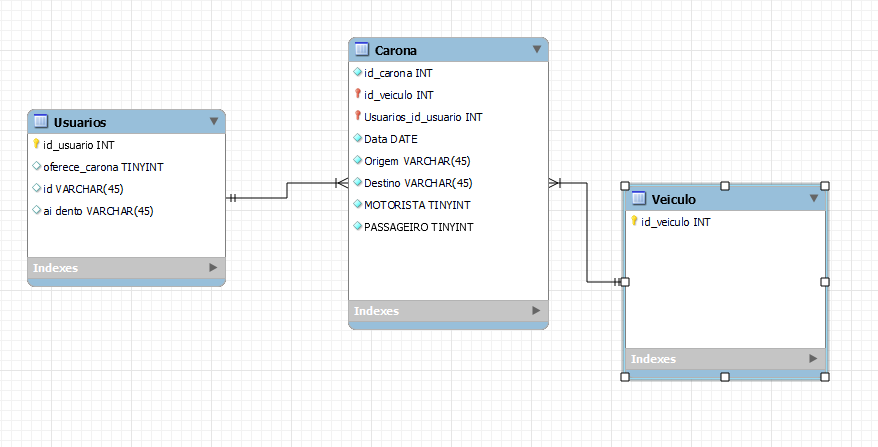
    

</div>

**Opcional**: caso julgue necessário, utilize o bloco abaixo para justificar decisões tomadas no desenho do diagrama.

<div class="alert alert-success">
Modelo simples de banco de dados em que as linhas vão se repetindo dentro da coluna carona, com o booleando entre motorista e passageiro.

</div>

**Exercício 10**: Discorra sobre armazenamento informações como senhas em tabelas de bancos de dados.

Esta questão será corrigida considerando a seguinte subrica:
| Conceito | Nota | Descrição                                                                                                                                               |
|:----------:|----------:|:---------------------------------------------------------------------------------------------------------------------------------------------------------|
| I        | 0.0 |Apenas citou o assunto ou alguns fatos sem explicações                                                                                                  |
| D        | 0.3 |Explicou superficialmente o assunto ou fatos mas sem muitos detalhes conclusivos                                                                        |
| C        | 0.6 |Explicou com detalhes, apresentando definições concretas.                                                                                               |
| B        | 0.8 |Explicou com detalhes, apresentando definições concretas e exemplos de uso.                                                                            |
| A        | 1.0 |Explicou com detalhes, apresentando definições concretas, exemplos de uso e ainda outros tópicos correlatos, fazendo uma conexão lógica entre eles. |

<div class="alert alert-success">

O uso de senha em banco de dados.
1. Hash é uma opção.

Ultilizar o hash de uma senha com uma secret especifica de dentro da empresa tras o problema de que tomando o conhecimento da secret usada um usuario interno pode ter acesso à todas as senhas. 
No entando, ainda é uma opção viável.
Principalmente daria para ter uma tabela externa que liga o usuario a suas credenciais.
Essa tabela pode ter permissões exclusivas para ser lida internamente na empresa.
Evitando que um "estagiário" venha a acessa-la e/ou muda-la.



2. Combinações.

O hash torna-se uma opção pois senhas mais complexas (caracteres diferentes) aumentam a complexidade do hash, trazendo uma maior combinação de valores possiveis. Sendo assim mais inacessíveis.

</div>

## Entrega!

É hora de entregar. Faça um **zip** do notebook + imagens chamado `ai_megadados.zip` e submeta no Blackboard!

**Obs**:
- `zip`, não use `rar`!
- Não precisa entregar os scripts fornecidos pelo professor (pasta scripts)